In [3]:
%pip install seaborn 

Mean Squared Error: 258.06
R² Score: -0.20


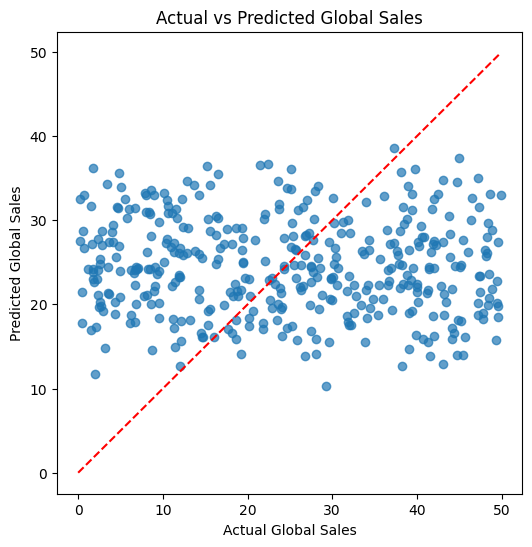

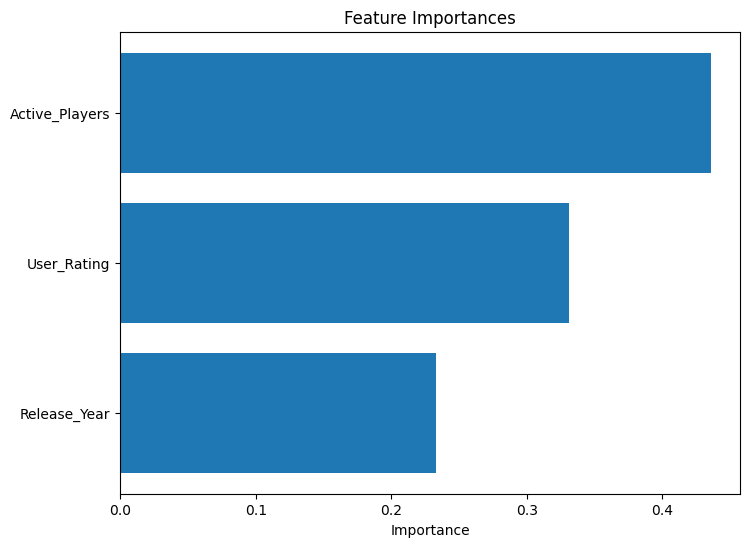

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  

# Load the data
data = pd.read_csv('game_dataset.csv')
data = data.dropna()  # Drop rows with missing values

# Select relevant features and the target variable
# I'm Excluding Game_ID and Game_Name from the features
X = data[['Release_Year', 'User_Rating', 'Active_Players']]  
y = data['Global_Sales']  # Target variable

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)  # This creates encoded columns for Genre and Platform

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model 
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = regressor.predict(X_test_scaled)

# Evaluate performance using Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Visualize the predicted vs actual sales
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.show()

# Feature importance bar graph
importances = regressor.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
plt.barh(features, importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()



